In [5]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import datetime
import matplotlib.pyplot as plt
# from dateutil.relativedelta import relativedelta

In [4]:
import sys

print("python版本:%s"% sys.version)

python版本:3.7.10 (default, Feb 20 2021, 21:17:23) 
[GCC 7.5.0]


In [1]:
! pip install neuralprophet

     |████████████████████████████████| 61kB 3.0MB/s 
     |████████████████████████████████| 748.8MB 23kB/s 
     |████████████████████████████████| 81kB 3.8MB/s 
ERROR: torchvision 0.9.1+cu101 has requirement torch==1.8.1, but you'll have torch 1.6.0 which is incompatible.
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.6.0 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [6]:
from neuralprophet import NeuralProphet
import pickle

In [116]:
# 读取文件时，将date列读取为index，此时索引类型为obj
df = pd.read_csv('dataset.csv', index_col = 'Date')

#df = df[:108]

# 将索引类型更改为DatetimeIndex
df.index = pd.DatetimeIndex(df.index)# 可直接多索引进行操作

df['ds'] = pd.DatetimeIndex(df.index)

In [117]:
df.tail()

,InternationArrivals(10k),Foreginer,HK_Macau,Taiwan,ds
Date,,,,,
2020-10-31,10.09,5.66,1.66,2.77,2020-10-31
2020-11-30,8.89,5.18,1.50,2.21,2020-11-30
2020-12-31,9.03,5.47,1.51,2.05,2020-12-31
2021-01-31,6.86,3.93,1.13,1.80,2021-01-31
2021-02-28,5.82,3.52,0.79,1.51,2021-02-28


In [118]:
df.drop(['Foreginer','HK_Macau','Taiwan'], axis = 1, inplace = True)
df.columns = ['y','ds']


In [138]:
df.describe()

,y
count,122.000000
mean,62.414590
std,21.123426
min,1.700000
25%,58.770000
50%,69.575000
75%,74.937500
max,87.460000


In [136]:
df.dtypes

y            float64
ds    datetime64[ns]
dtype: object

# 2. Train Model

In [97]:
m = Prophet(interval_width=0.95, yearly_seasonality=True) # 0.95是置信区间
model = m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [121]:
m1 = NeuralProphet()
m1.fit(df, freq = 'M', epochs = 2000)
#MAE: Mean Absolute Error, 2 degrees plus or minus out from the actual value

INFO: nprophet.utils - set_auto_seasonalities: Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:nprophet.utils:Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:nprophet.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO:nprophet.config:Auto-set batch_size to 8


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 6.58E-01
INFO:nprophet:learning rate range test found optimal lr: 6.58E-01
Epoch[2000/2000]: 100%|██████████| 2000/2000 [01:06<00:00, 29.91it/s, SmoothL1Loss=0.00734, MAE=7.94, RegLoss=0]


,SmoothL1Loss,MAE,RegLoss
0,0.475998,84.325703,0.0
1,0.223825,51.857304,0.0
2,0.133012,38.331257,0.0
3,0.083331,29.809814,0.0
4,0.051201,24.307257,0.0
...,...,...,...
1995,0.007341,7.947612,0.0
1996,0.007341,7.946237,0.0
1997,0.007342,7.945304,0.0
1998,0.007341,7.943982,0.0


# 3. Forecast Away

In [98]:
future = m.make_future_dataframe(periods=24, freq='M') #periods为往前预测的步数
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-01-31,76.171312,30.608975,97.659081,76.171312,76.171312,-11.537302,-11.537302,-11.537302,-11.537302,-11.537302,-11.537302,0.0,0.0,0.0,64.634010
1,2011-02-28,75.971108,25.118038,95.875677,75.971108,75.971108,-15.178703,-15.178703,-15.178703,-15.178703,-15.178703,-15.178703,0.0,0.0,0.0,60.792405
2,2011-03-31,75.749453,48.161890,113.581091,75.749453,75.749453,4.969545,4.969545,4.969545,4.969545,4.969545,4.969545,0.0,0.0,0.0,80.718998
3,2011-04-30,75.534948,46.541779,115.693597,75.534948,75.534948,5.187107,5.187107,5.187107,5.187107,5.187107,5.187107,0.0,0.0,0.0,80.722055
4,2011-05-31,75.313294,44.473271,113.017941,75.313294,75.313294,2.742397,2.742397,2.742397,2.742397,2.742397,2.742397,0.0,0.0,0.0,78.055690


In [25]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
127,2021-08-31,80.329834,73.319036,85.068026,79.416908,81.375599,-1.527045,-1.527045,-1.527045,-1.527045,-1.527045,-1.527045,0.0,0.0,0.0,78.802789
128,2021-09-30,80.498639,77.208662,88.658251,79.529220,81.611167,2.545397,2.545397,2.545397,2.545397,2.545397,2.545397,0.0,0.0,0.0,83.044036
129,2021-10-31,80.673071,85.184364,96.969095,79.623495,81.871206,10.219096,10.219096,10.219096,10.219096,10.219096,10.219096,0.0,0.0,0.0,90.892168
130,2021-11-30,80.841877,80.498957,92.098923,79.718925,82.121661,5.641588,5.641588,5.641588,5.641588,5.641588,5.641588,0.0,0.0,0.0,86.483464
131,2021-12-31,81.016309,69.803721,81.815915,79.804023,82.371171,-5.192438,-5.192438,-5.192438,-5.192438,-5.192438,-5.192438,0.0,0.0,0.0,75.823871


In [99]:
forecast[['ds','yhat']]

,ds,yhat
0,2011-01-31,64.634010
1,2011-02-28,60.792405
2,2011-03-31,80.718998
3,2011-04-30,80.722055
4,2011-05-31,78.055690
...,...,...
140,2022-09-30,47.265605
141,2022-10-31,54.214857
142,2022-11-30,50.684226
143,2022-12-31,40.510231


In [27]:
import csv
f = open('experiment_data.csv', 'w', encoding='utf-8',newline="")
np.savetxt('experiment_data.csv',forecast[['yhat']],delimiter=',')

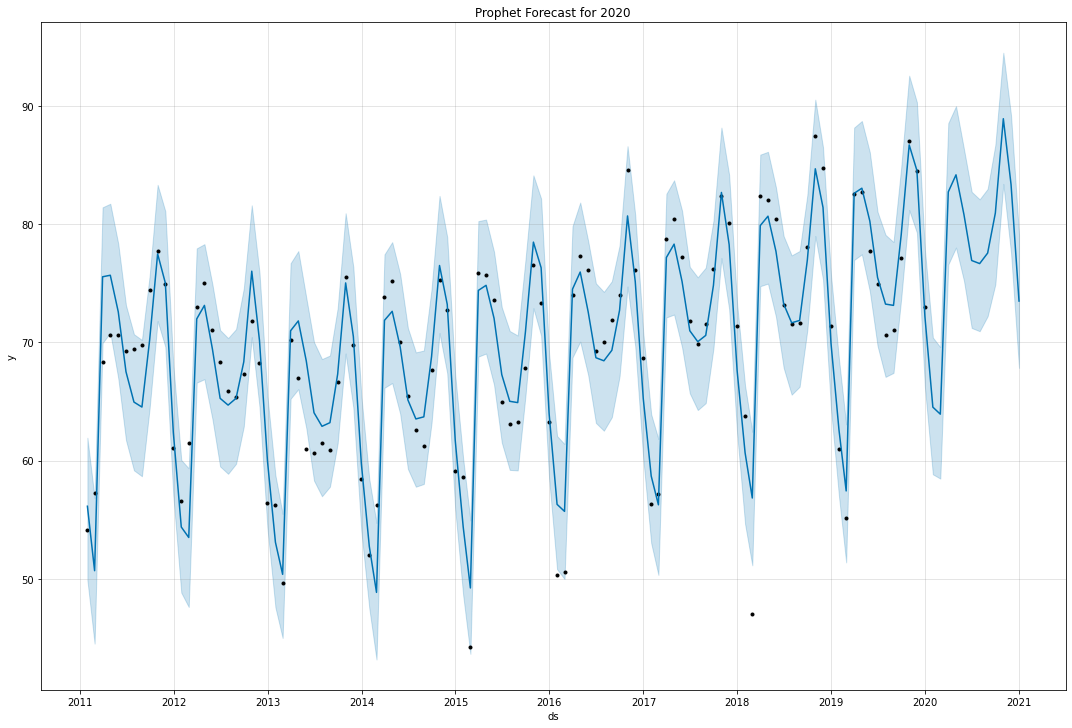

In [17]:
plot1 = m.plot(forecast,figsize=(15,10))
plt.title('Prophet Forecast for 2020 and 2021')
plt.savefig('ProphetForecast2020.pdf',dpi=500,bbox_inches='tight')
#蓝色的线为预测值，即yhat
#蓝色阴影区域为预测区间：yhat_lower -- yhat_upper


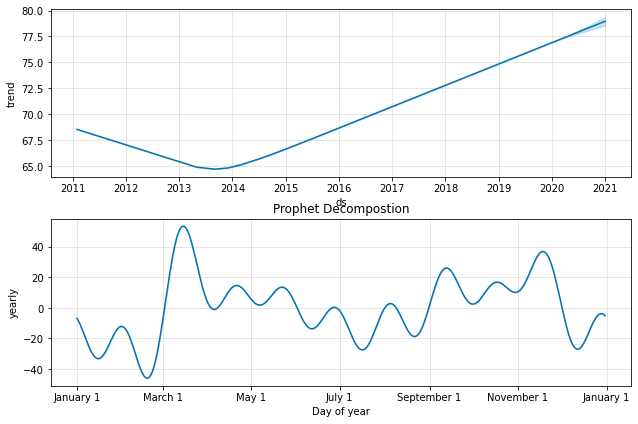

In [16]:
plot2 = m.plot_components(forecast)
plt.title('Prophet Decompostion')
plt.savefig('ProphetDecompostion.pdf',dpi=500,bbox_inches='tight')

In [ ]:
##data = pd.read_excel('data3.xlsx')
#data.columns = ['date', 'y']
#data['date'] = pd.to_datetime(data['date'], format='%Y%m%d%H')
#data.y.plt()

In [ ]:
#data = data[data.date < '20201031']
#result = prophet(data)from array import array

#predict = result.tail(24).yhat.values
#actual = data.tail(24).y.values
#x = [x for x in range(24)]
#fig, ax = plt.subplots(figsize=(15,5),dpi = 300)
#ax.plot(x, predict, linewidth=2.0,label = "predict")
#ax.plot(x, actual, linewidth=2.0,label = "actual")
#ax.legend(loc=2);
# ax.set_title(bf_name)
#     plt.ylim((0, 450000))
#plt.grid(linestyle='-.')
#plt.show()

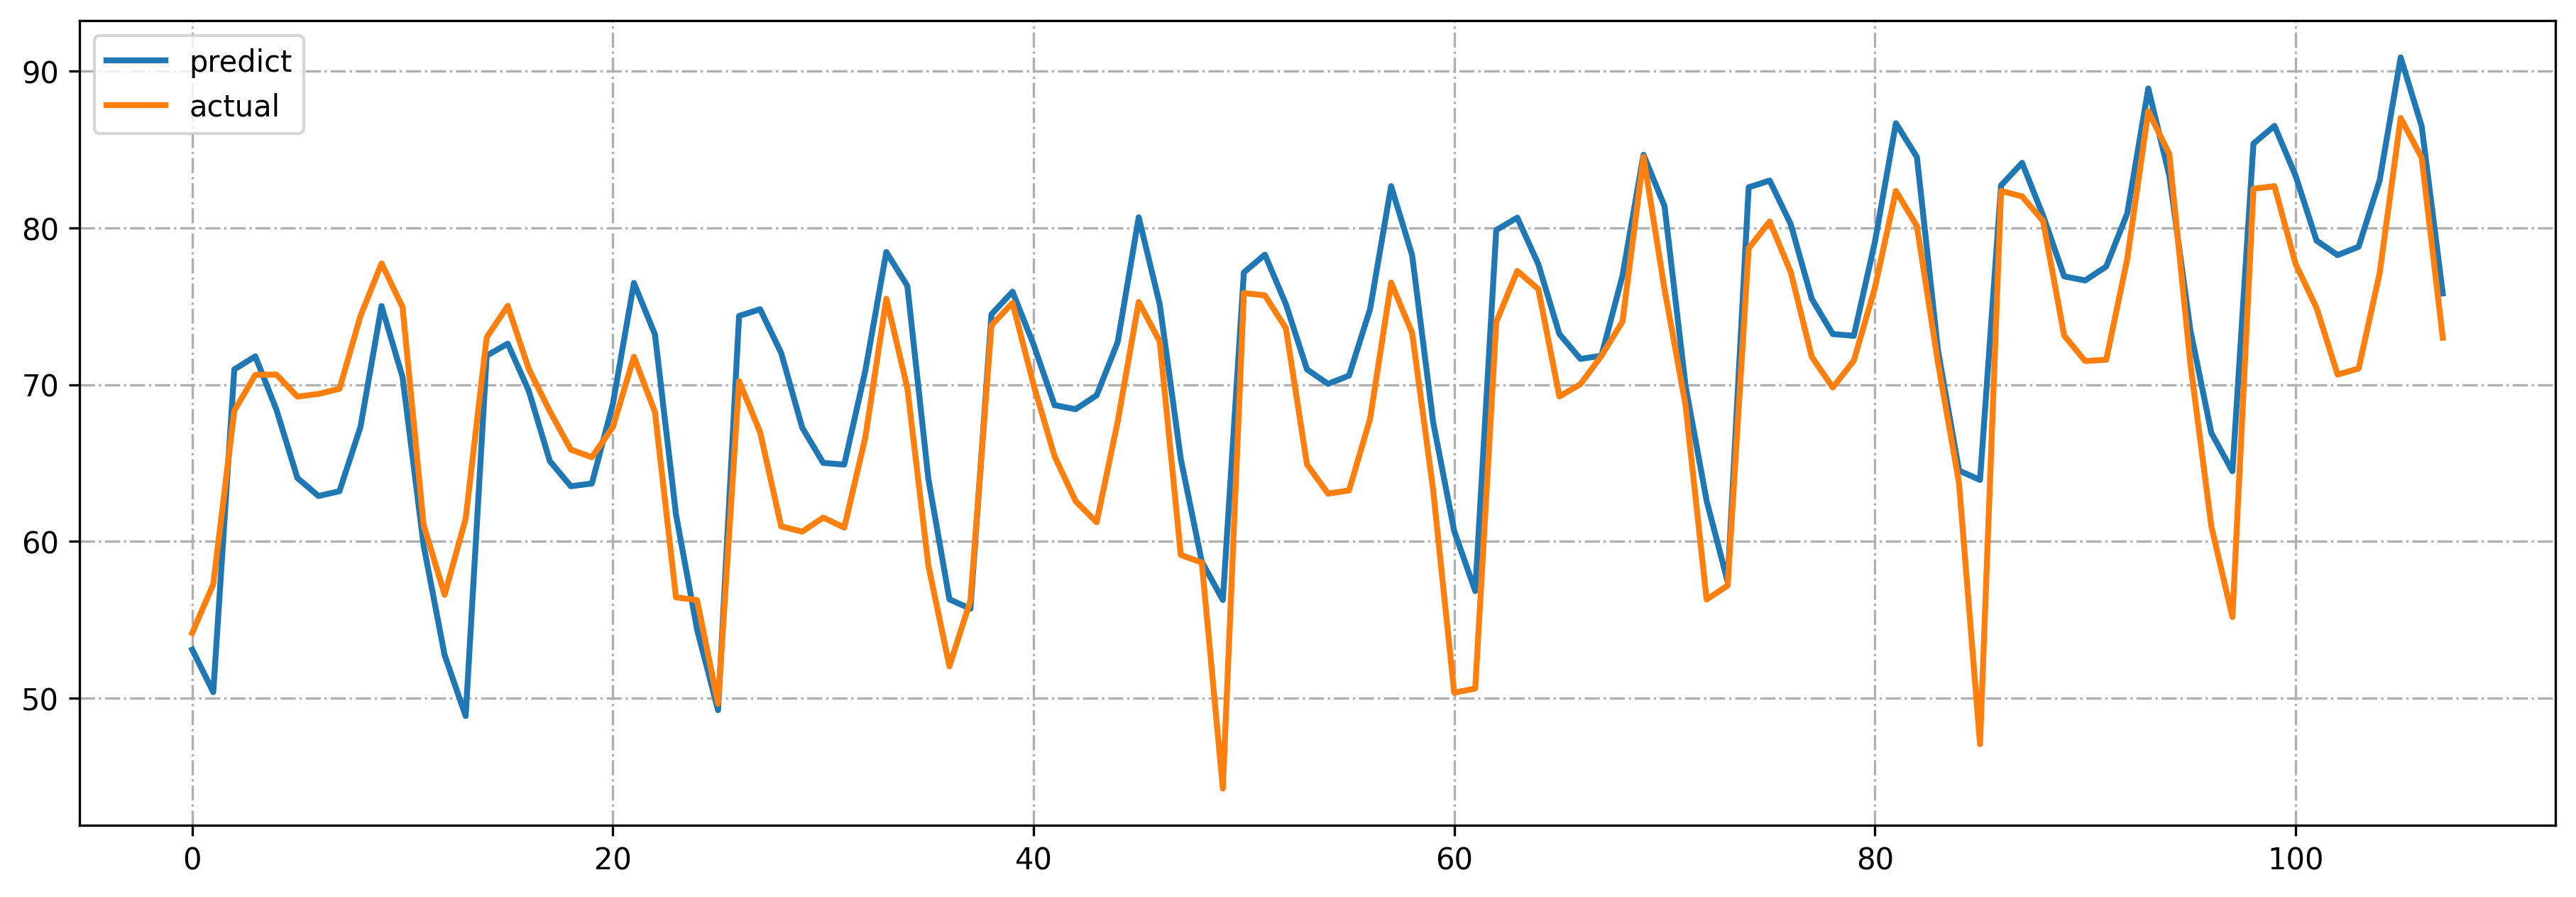

In [28]:
predict = forecast.tail(108).yhat.values
actual = df.tail(108).y.values
x = [x for x in range(108)]
fig, ax = plt.subplots(figsize=(15,5),dpi = 300)
ax.plot(x, predict, linewidth=2.0,label = "predict")
ax.plot(x, actual, linewidth=2.0,label = "actual")
ax.legend(loc=2);
# ax.set_title(bf_name)
#     plt.ylim((0, 450000))
plt.grid(linestyle='-.')
plt.show()

In [29]:
error = 0
summery = 0
for i in range(12):
    error += abs(predict[i] - actual[i])
    summery += actual[i]
acc = 1 - error/summery
acc

0.9415055125825326

In [30]:
#MAPE
error = 0
for i in range(12):
    error += abs((actual[i] - predict[i])/actual[i])
    
MAPE = error/12
MAPE

0.05838629909623553

In [31]:
#RMSE
import math
error = 0
for i in range(12):
  error += (actual[i] - predict[i])*(actual[i] - predict[i])

RMSE = math.sqrt(error/12)
RMSE

4.5946102628333545

In [187]:
future1 = m1.make_future_dataframe(df, periods=12)
forecast1= m1.predict(future1)
forecast1.head()

,ds,y,yhat1,residual1,trend,season_yearly
0,2021-03-31,None,17.848389,NaN,14.284564,3.563825
1,2021-04-30,None,16.871552,NaN,12.535876,4.335678
2,2021-05-31,None,12.695449,NaN,10.728925,1.966523
3,2021-06-30,None,7.666539,NaN,8.980239,-1.313700
4,2021-07-31,None,4.743528,NaN,7.173265,-2.429736


In [188]:
future1

,ds,y,t,y_scaled
0,2021-03-31,None,1.008422,NaN
1,2021-04-30,None,1.016572,NaN
2,2021-05-31,None,1.024993,NaN
3,2021-06-30,None,1.033143,NaN
4,2021-07-31,None,1.041565,NaN
5,2021-08-31,None,1.049986,NaN
6,2021-09-30,None,1.058136,NaN
7,2021-10-31,None,1.066558,NaN
8,2021-11-30,None,1.074708,NaN
9,2021-12-31,None,1.083130,NaN


In [189]:
forecast1.tail()

,ds,y,yhat1,residual1,trend,season_yearly
7,2021-10-31,None,12.058978,NaN,1.810653,10.248326
8,2021-11-30,None,7.534067,NaN,0.061966,7.472102
9,2021-12-31,None,-3.315432,NaN,-1.744985,-1.570447
10,2022-01-31,None,-13.799703,NaN,-3.551960,-10.247743
11,2022-02-28,None,-21.278097,NaN,-5.184049,-16.094048


In [106]:
df[['ds','y']].describe

<bound method NDFrame.describe of                    ds      y
Date                        
2011-01-31 2011-01-31  54.16
2011-02-28 2011-02-28  57.27
2011-03-31 2011-03-31  68.34
2011-04-30 2011-04-30  70.63
2011-05-31 2011-05-31  70.65
...               ...    ...
2020-09-30 2020-09-30   9.26
2020-10-31 2020-10-31  10.09
2020-11-30 2020-11-30   8.89
2020-12-31 2020-12-31   9.03
2021-01-31 2021-01-31   6.86

[121 rows x 2 columns]>

In [184]:
lstm_predict_24 = np.array([55.89622 , 43.255898, 67.57384 , 83.90536 , 82.43293 , 70.318825,
       63.12141 , 65.31269 , 76.99226 , 87.82257 , 82.29223 , 70.2058  ,
       53.101036, 53.77537 , 77.66042 , 83.947296, 85.40758 , 74.75214 ,
       64.24102 , 70.13242 , 89.22018 , 95.331184, 84.374596, 74.28636 ],
      dtype='float32')

lstm_predict_12 = np.array([66.38934, 50.98586, 85.30576, 85.88973, 84.61338, 76.04376, 72.57022, 70.73072,
 77.93789, 85.70998, 87.64929, 75.811 ])

lstm_predict_next12m = np.array([7.9228425,  8.614603,   9.024617,   9.658957,  10.5822935, 12.019329,
 13.853703,  15.929817,  17.396399,  18.758476,  20.57539,22.753551])

In [190]:
day_new = np.arange(1,123)
day_pred=np.arange(123,135)

In [193]:
np.savetxt('experiment_data_lstm.csv',lstm_predict_next12m,delimiter=',')
np.savetxt('experiment_data_NP.csv',predict,delimiter=',')

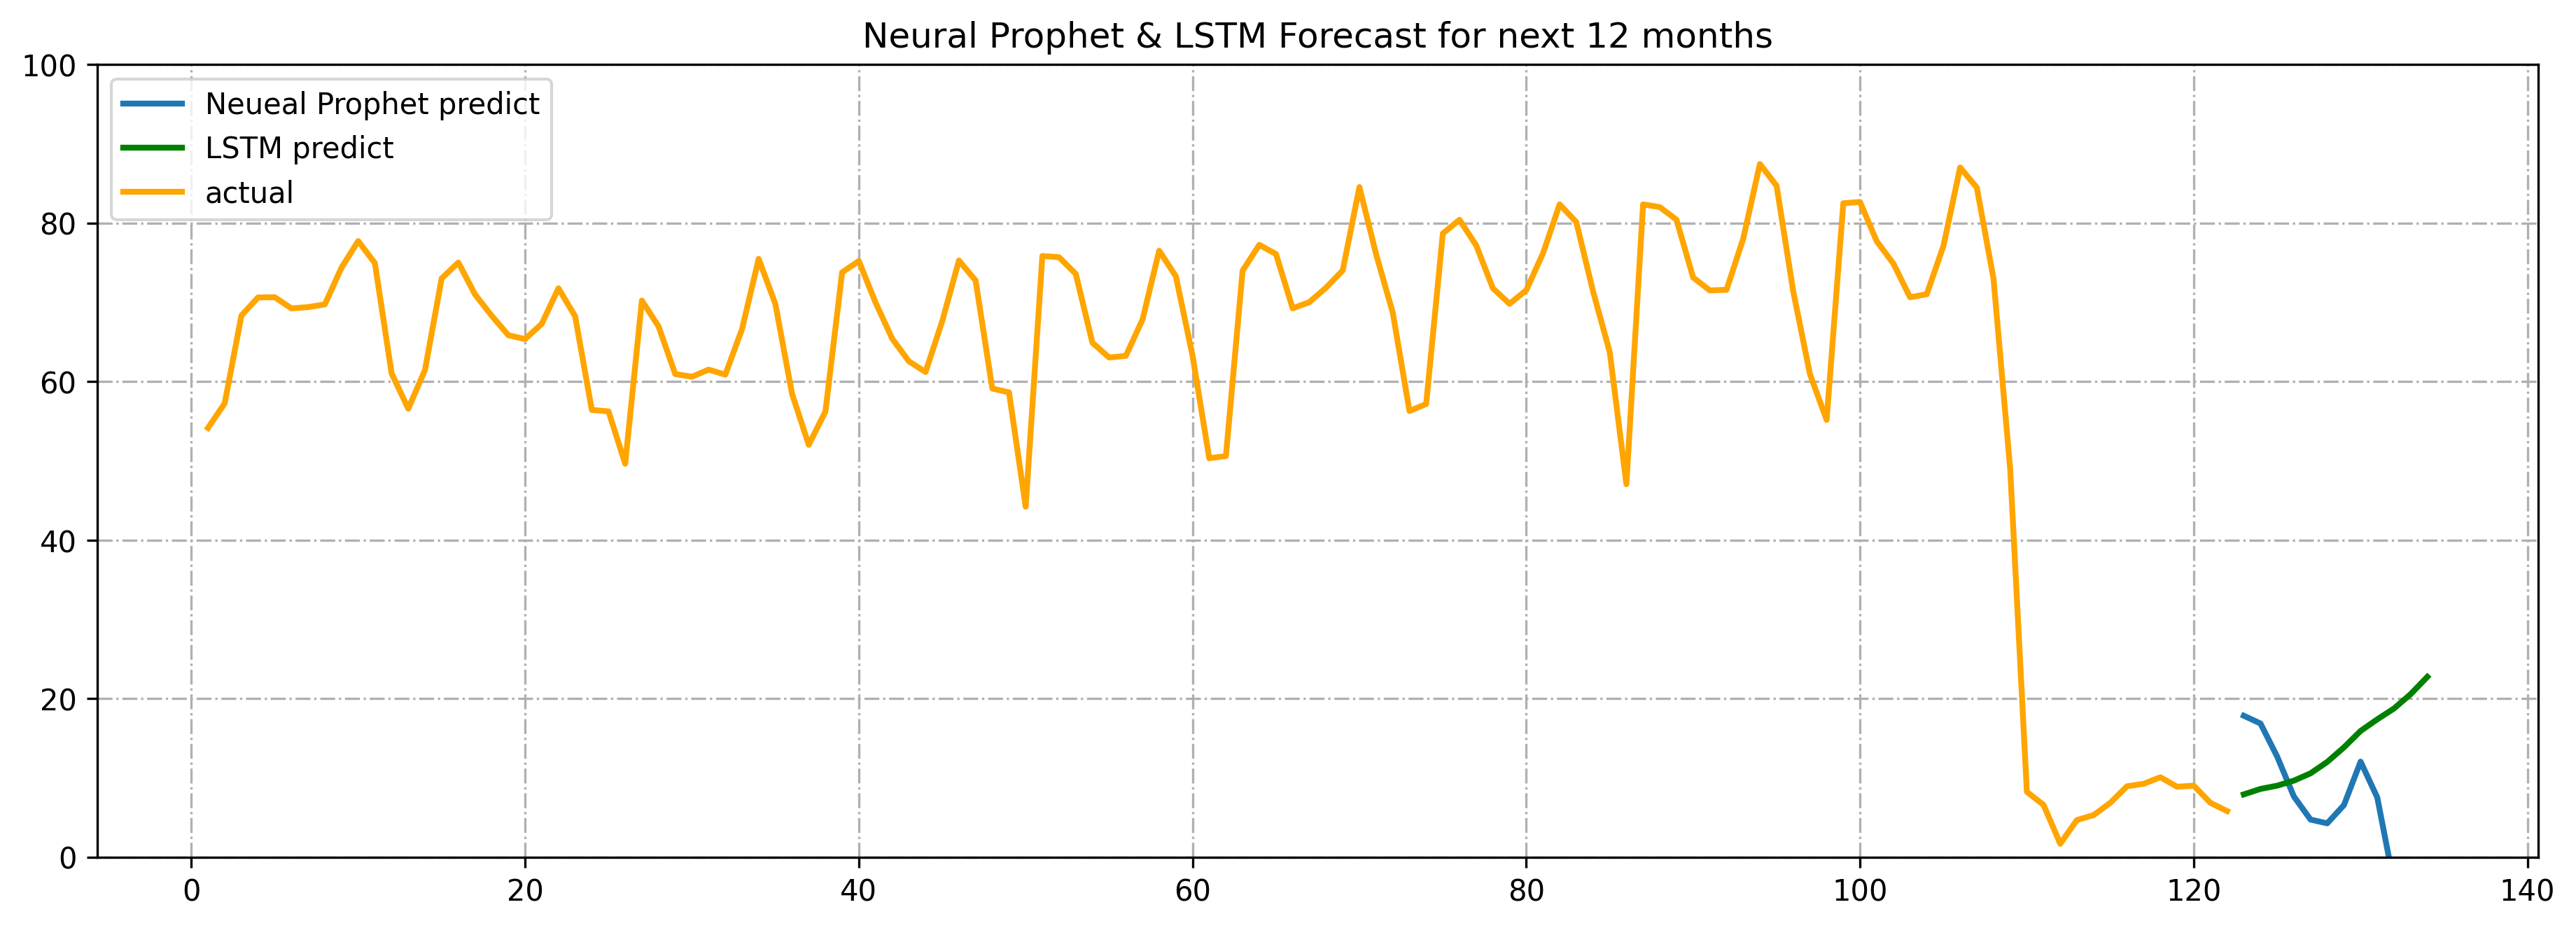

In [192]:
predict = forecast1.yhat1.values
actual = df.tail(123).y.values
#x = [x for x in range(12)]
fig, ax = plt.subplots(figsize=(15,5),dpi = 300)
ax.plot(day_pred, predict, linewidth=2.0,label = "Neueal Prophet predict", color= '#1f77b4')
ax.plot(day_pred, lstm_predict_next12m, linewidth=2.0,label = "LSTM predict", color = 'g')
ax.plot(day_new, actual, linewidth=2.0,label = "actual", color = 'orange')
ax.legend(loc=2);
# ax.set_title(bf_name)
plt.ylim((0, 100))
plt.grid(linestyle='-.')

plt.title('Neural Prophet & LSTM Forecast for next 12 months')
plt.savefig('NP&LSTMForecastnext12m.pdf',dpi=500,bbox_inches='tight')


In [71]:
NeuralPropher_24 = forecast1.yhat1.values
print(NeuralPropher_24)

[64.08577728 60.87185669 82.50813293 83.71379089 80.13189697 76.28713989
 74.20401001 75.11732483 79.29577637 87.66472626 82.96762085 72.31820679
 64.42608643 61.7652359  83.75521851 84.75415039 81.5307312  77.30557251
 75.59576416 76.0802002  80.62414551 88.6028595  84.46021271 73.34535217]


In [56]:
error = 0
summery = 0
for i in range(24):
    error += abs(predict[i] - actual[i])
    summery += actual[i]
acc = 1 - error/summery
acc

0.8557193341406641

In [57]:
#MAPE
error = 0
for i in range(24):
    error += abs((actual[i] - predict[i])/actual[i])
    
MAPE = error/24
MAPE

0.14530809235633688

In [58]:
#RMSE
import math
error = 0
for i in range(24):
  error += (actual[i] - predict[i])*(actual[i] - predict[i])

RMSE = math.sqrt(error/24)
RMSE

10.548603977968922

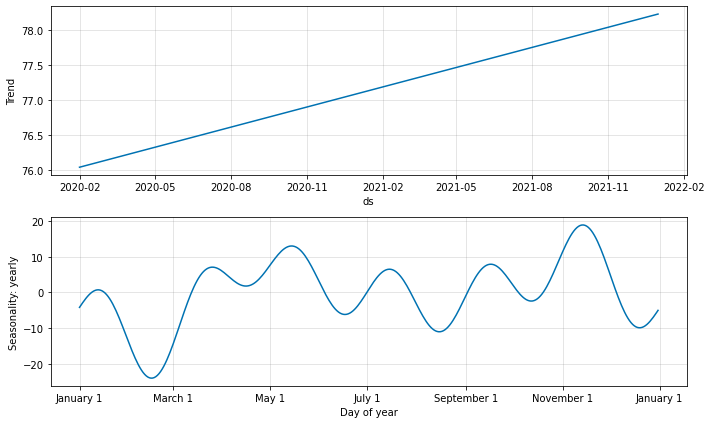

In [ ]:
plot2 = m1.plot_components(forecast1)

# 4. Save Model

In [2]:
with open('ProphetForecast_model.pk1', "wb") as f: #wb: write binary
  pickle.dump(m, f)

with open('NeuralProphetForecast_model.pk1', "wb") as f:
  pickle.dump(m1, f)


NameError: ignored

In [3]:
m
m1

NameError: ignored

In [ ]:
#ACC
error = 0
summery = 0
for i in range(24):
    error += abs(predict[i] - actual[i])
    summery += actual[i]
acc = 1 - error/summery
acc

In [ ]:
#MAPE
error = 0
for i in range(24):
    error += abs((actual[i] - predict[i])/actual[i])
    
MAPE = error/24
MAPE

In [ ]:
#RMSE
import math
error = 0
for i in range(24):
  error += (actual[i] - predict[i])*(actual[i] - predict[i])

RMSE = math.sqrt(error/24)
RMSE